# Exploratory Data Analysis on COVID-19: SQL Results Visualization

This notebook presents a visual exploration of key SQL-based insights derived from the **COVID-19 dataset** (Our World in Data).  
The analysis focuses on understanding how the pandemic evolved across continents and how vaccination campaigns influenced mortality rates over time.

**Objectives:**
- Visualize trends in COVID-19 deaths and vaccinations.
- Compare regional death and vaccination rates.
- Identify correlations and disparities across continents and countries.

All datasets used here were generated through SQL queries and exported from SQL Server into CSV format.


In [88]:
# Data import : Load all CSV files exported from SQL Server and hosted on GitHub

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Helper to load CSV files using ; as separator
def load_csv(url: str) -> pd.DataFrame:
    return pd.read_csv(url, sep=';')

# URLs
url_avg_daily_deaths = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/average_daily_deaths_before%20_after%20_vaccination.csv"
url_avg_vacc_rate_cont = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/average_vaccination_rate_continent.csv"
url_lowest_death_countries = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/countries_ranked_lowest_death_rate.csv"
url_death_rate_cont = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/death_rate_continent.csv"
url_top_infection = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/top10_highest_infection_rate.csv"
url_top_vacc_countries = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/top_countries_highest_vaccination_rate.csv"
url_cumulative_deaths = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/total_cumulative_deaths.csv"
url_cumulative_vacc = "https://raw.githubusercontent.com/zakabdelhamid/Exploratory-Analysis-of-COVID-19-Deaths-and-Vaccination-with-SQL/refs/heads/main/data/total_cumulative_vaccinations.csv"

# Load datasets
df_avg_daily_deaths = load_csv(url_avg_daily_deaths)
df_avg_vacc_rate_cont = load_csv(url_avg_vacc_rate_cont)
df_lowest_death_countries = load_csv(url_lowest_death_countries)
df_death_rate_cont = load_csv(url_death_rate_cont)
df_top_infection = load_csv(url_top_infection)
df_top_vacc_countries = load_csv(url_top_vacc_countries)
df_cumulative_deaths = load_csv(url_cumulative_deaths)
df_cumulative_vacc = load_csv(url_cumulative_vacc)


# Quick check
df_death_rate_cont.head()



,continent,death_rate
0,North America,"0,000565182"
1,South America,"0,00056155"
2,Europe,"0,000478624"
3,Asia,"4,19E-05"
4,Africa,"3,39E-05"


In [89]:
# Example check for 2–3 key datasets
df_death_rate_cont.info()
df_avg_vacc_rate_cont.info()
df_cumulative_deaths.head()
df_cumulative_vacc.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   continent   6 non-null      object
 1   death_rate  6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   continent             6 non-null      object
 1   avg_vaccination_rate  6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


,date,cumulative_vaccinations
0,2020-01-01 00:00:00.000,NaN
1,2020-01-02 00:00:00.000,NaN
2,2020-01-03 00:00:00.000,NaN
3,2020-01-04 00:00:00.000,NaN
4,2020-01-05 00:00:00.000,NaN


#### Visualization 1 : Global cumulative deaths over time

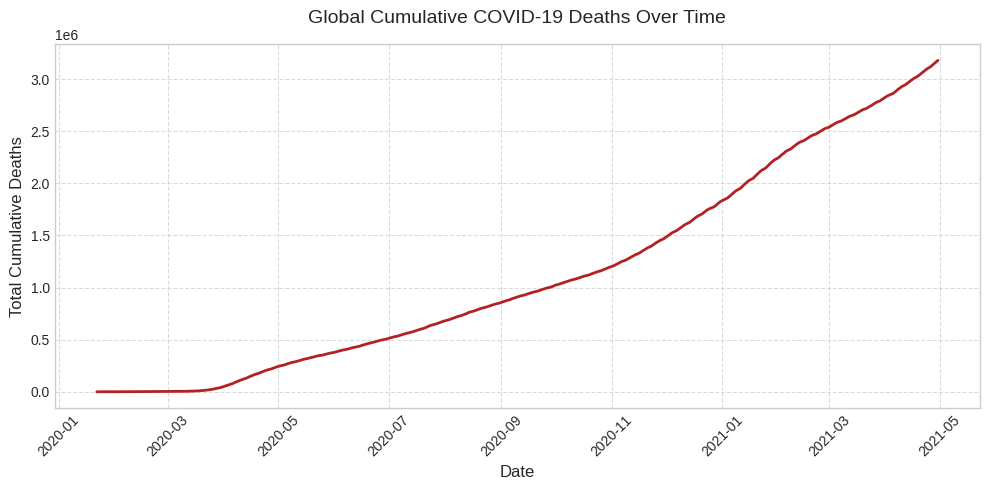

In [90]:
# Rename columns for clarity
df_cumulative_deaths.columns = ['date', 'cumulative_deaths']

# Convert date column to datetime format
df_cumulative_deaths['date'] = pd.to_datetime(df_cumulative_deaths['date'])

# --- Visualization ---
plt.figure(figsize=(10, 5))
plt.plot(df_cumulative_deaths['date'], df_cumulative_deaths['cumulative_deaths'],
         color='firebrick', linewidth=2)

# Add titles and labels
plt.title('Global Cumulative COVID-19 Deaths Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cumulative Deaths', fontsize=12)

# Improve date readability
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()


The line chart shows the global progression of COVID-19 deaths over time.  
We observe a steep increase in cumulative deaths during the major pandemic waves between 2020 and mid 2021.


#### Visualization 2 : Global cumulative deaths over time

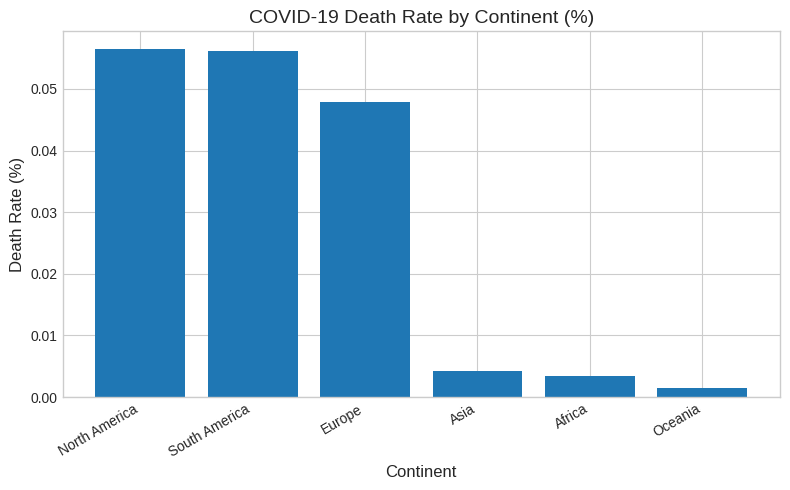

In [91]:
# Ensure correct columns and numeric format
df_death_rate_cont.columns = ['continent', 'death_rate']
df_death_rate_cont['death_rate'] = (
    df_death_rate_cont['death_rate']
    .astype(str)
    .str.replace(',', '.')
    .astype(float)
)

# Bar chart: COVID-19 death rate by continent
plt.figure(figsize=(8, 5))
plt.bar(df_death_rate_cont['continent'], df_death_rate_cont['death_rate'] * 100)
plt.title('COVID-19 Death Rate by Continent (%)')
plt.xlabel('Continent')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


This chart shows higher COVID-19 death rates in North and South America, followed by Europe, while Asia, Africa, and Oceania record significantly lower rates. These differences may reflect variations in demographics, testing and reporting practices, healthcare capacity, and exposure to early waves.


#### Visualization 3 : Global cumulative vaccinations over time


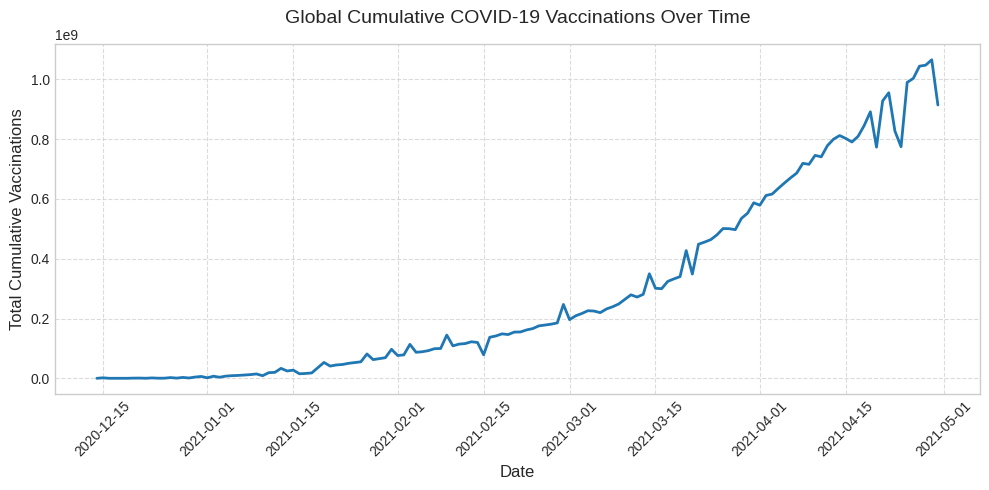

In [92]:
df_cumulative_vacc.columns = ['date', 'cumulative_vaccinations']

# Convert date column to datetime
df_cumulative_vacc['date'] = pd.to_datetime(df_cumulative_vacc['date'])
# Plot cumulative vaccinations over time
plt.figure(figsize=(10, 5))
plt.plot(df_cumulative_vacc['date'], df_cumulative_vacc['cumulative_vaccinations'], linewidth=2)

plt.title('Global Cumulative COVID-19 Vaccinations Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cumulative Vaccinations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The chart highlights the rapid acceleration of global vaccination campaigns from late 2020 onward.  
The cumulative curve rises steeply during 2021, reflecting large-scale rollouts, then gradually slows down, indicating a saturation phase where most target populations have been reached.


#### Visualization 4 : Global cumulative deaths vs vaccinations over time


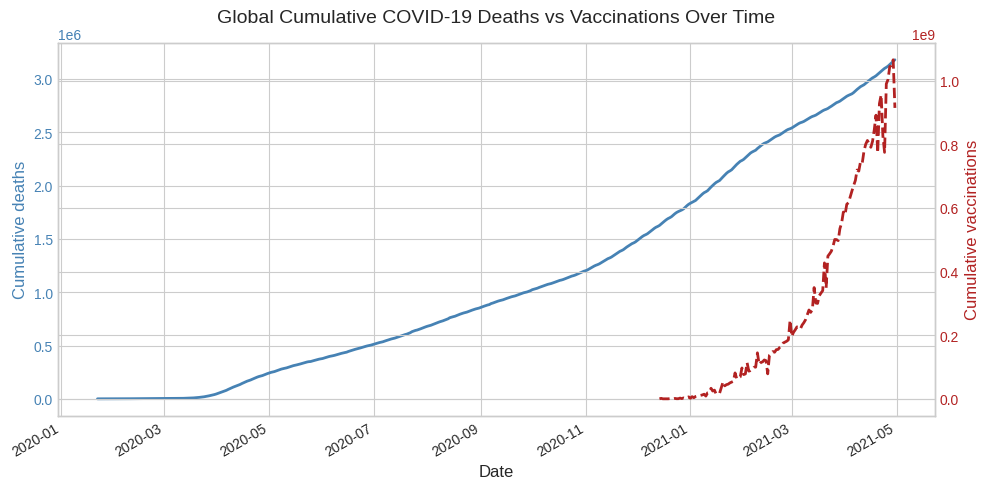

In [93]:
# Merge on date to align both series
df_merged = pd.merge(df_cumulative_deaths, df_cumulative_vacc, on='date', how='inner')

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Curve 1: cumulative deaths (blue)
ax1.plot(df_merged['date'], df_merged['cumulative_deaths'], linewidth=2, color='steelblue', label='Cumulative deaths')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative deaths', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Curve 2: cumulative vaccinations (red)
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['cumulative_vaccinations'], linewidth=2, linestyle='--', color='firebrick', label='Cumulative vaccinations')
ax2.set_ylabel('Cumulative vaccinations', fontsize=12, color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Title and layout
plt.title('Global Cumulative COVID-19 Deaths vs Vaccinations Over Time', fontsize=14, pad=15)
fig.autofmt_xdate()
fig.tight_layout()

plt.show()


The dataset covers the period from early 2020 to mid-May 2021, corresponding to the initial stages of global vaccination rollout.  
During this window, cumulative deaths continue to rise steadily, while vaccination numbers start increasing sharply only in 2021.  
Because the dataset ends before late 2021, it does **not yet capture** the later slowdown in global mortality that followed widespread vaccination coverage.


#### Visualization 5 : Average vaccination rate by continent


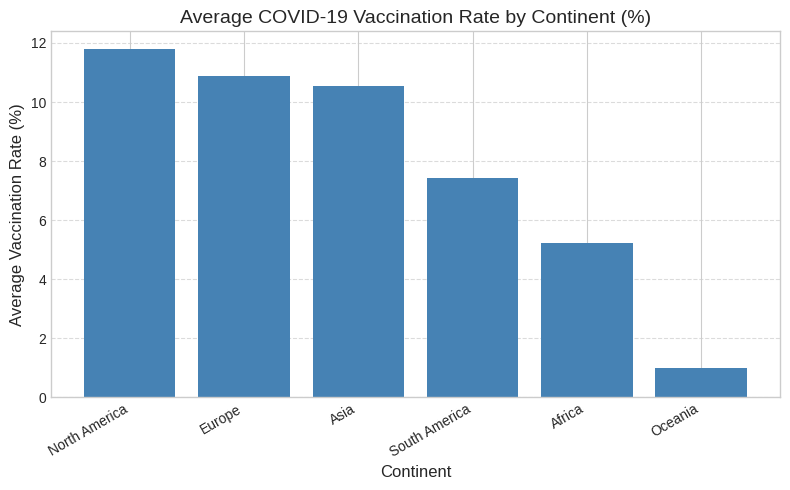

In [100]:
plt.figure(figsize=(8, 5))
plt.bar(df_avg_vacc_rate_cont['continent'], df_avg_vacc_rate_cont['avg_vaccination_rate'] * 100,
        color='steelblue')

plt.title('Average COVID-19 Vaccination Rate by Continent (%)', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Vaccination Rate (%)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This chart highlights clear differences in vaccination coverage across continents.  
Some regions reach much higher average vaccination rates, while others remain significantly lower, underlining global inequalities in vaccine access and rollout capacity.


#### Visualization 6 : Average daily deaths before vs after vaccination

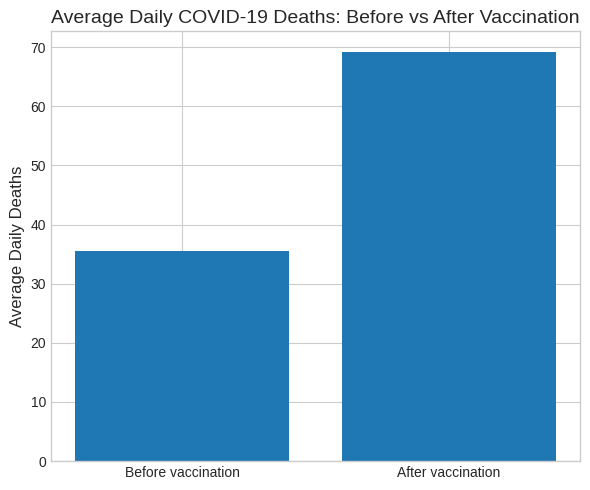

In [102]:
# Ensure correct columns and numeric format
df_avg_daily_deaths.columns = ['location', 'avg_daily_deaths_before_vax', 'avg_daily_deaths_after_vax']
df_avg_daily_deaths['avg_daily_deaths_before_vax'] = (
    df_avg_daily_deaths['avg_daily_deaths_before_vax']
    .astype(str)
    .str.replace(',', '.')
    .astype(float)
)
df_avg_daily_deaths['avg_daily_deaths_after_vax'] = (
    df_avg_daily_deaths['avg_daily_deaths_after_vax']
    .astype(str)
    .str.replace(',', '.')
    .astype(float)
)

# Prepare average values
before = df_avg_daily_deaths['avg_daily_deaths_before_vax'].mean()
after = df_avg_daily_deaths['avg_daily_deaths_after_vax'].mean()

# Bar chart: average daily deaths before vs after vaccination
plt.figure(figsize=(6, 5))
plt.bar(['Before vaccination', 'After vaccination'], [before, after])
plt.title('Average Daily COVID-19 Deaths: Before vs After Vaccination')
plt.ylabel('Average Daily Deaths')
plt.tight_layout()
plt.show()


Although the average number of daily deaths appears higher after the start of vaccination campaigns, this result reflects **the timing of global outbreaks rather than vaccine inefficiency**.  
Vaccination efforts began during a period of intense transmission (late 2020–early 2021), when global death counts were already peaking.  
To properly assess vaccine impact, a longer time window and country-specific analyses would be required.


### Key Takeaways
- **Data coverage limitation:** The datasets used capture the early stages of vaccination campaigns (up to mid-2021), which limits the observation of long-term vaccine impact on global mortality.  
- **Global disparities:** Vaccination and death rates vary widely across continents — higher vaccination coverage in Europe and the Americas correlates with stronger health infrastructure and faster rollout capacity.  
- **Temporal overlap:** The apparent rise in deaths after vaccination begins reflects overlapping pandemic waves, not vaccine inefficiency. Vaccination campaigns were launched during the most critical phases of global transmission.  
- **Data reliability:** Reported figures depend on national reporting systems, which differ in completeness and frequency, especially in developing regions.  

### Business Recommendations
- **Strengthen data governance:** Public health organizations should ensure consistent, timely, and standardized COVID-19 data reporting across all regions to enable real-time analysis and decision-making.  
- **Invest in vaccination analytics:** Governments and NGOs can develop dashboards that monitor vaccination progress, coverage by demographic group, and corresponding health outcomes to guide targeted interventions.  
- **Promote equity in distribution:** Insights from continental disparities highlight the need for equitable vaccine access — reallocating surplus doses and resources to low-coverage regions would improve global resilience.  
- **Extend analysis window:** Future analytics projects should integrate post-2021 data to evaluate the long-term correlation between vaccination coverage and reductions in mortality and hospitalizations.  
- **Combine data sources:** Merging vaccination data with socioeconomic, demographic, and healthcare capacity indicators would yield deeper insights into the drivers of pandemic outcomes.  
